# **Import librares**

In [ ]:
!pip install Keras-Preprocessing
import numpy as np
import pandas as pd
import nltk
import tensorflow as tf
from nltk.corpus import stopwords
from nltk.corpus import reuters
from nltk.corpus import brown
from nltk.corpus import gutenberg
from nltk.tokenize import RegexpTokenizer
from nltk.stem import SnowballStemmer
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pickle
import joblib
from collections import Counter
from textblob import Word 
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC, SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.model_selection import KFold 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, f1_score, recall_score
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential, load_model
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from keras_preprocessing.sequence import pad_sequences
from keras.utils.np_utils import to_categorical
from keras.layers import Activation, Dense, Embedding, LSTM, SpatialDropout1D, Dropout, Flatten, GRU, Conv1D, MaxPooling1D, Bidirectional
from wordcloud import WordCloud,ImageColorGenerator
from PIL import Image
import urllib
import requests
import re
!pip install ktrain
import ktrain
from ktrain import text
sns.set()
%matplotlib inline
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('gutenberg')
nltk.download('brown')
nltk.download("reuters")
nltk.download('words')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 KB 1.9 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.3/25.3 MB 28.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 KB 34.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.4/265.4 KB 28.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 23.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 47.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.8/468.8 KB 34.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ...

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Unzipping corpora/gutenberg.zip.
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package reuters to /root/nltk_data...
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

### **Load Dataset**

In [ ]:
df=pd.read_csv("/content/bbc-text.csv", engine='python', encoding='UTF-8')
df['category'].value_counts()

Sport            511
Business         510
Politics         417
Tech             401
Entertainment    386
Name: category, dtype: int64

In [ ]:
df.to_csv("bbc-text.csv", index=False)

In [ ]:
df['category'].value_counts()

Sport            511
Business         510
Politics         417
Tech             401
Entertainment    386
Name: category, dtype: int64

# **Data Cleaning**

In [ ]:
df['text']=df['text'].fillna("") 
df.isna().sum()

category    0
text        0
dtype: int64

# **Preprocessing**

In [ ]:
df['lower_case'] = df['text'].apply(lambda x: x.lower().strip().replace('\n', ' ').replace('\r', ' '))

df['alphabatic'] = df['lower_case'].apply(lambda x: re.sub(r'[^a-zA-Z\']', ' ', x)).apply(lambda x: re.sub(r'[^\x00-\x7F]+', '', x))
df['without-link'] = df['alphabatic'].apply(lambda x: re.sub(r'http\S+', '', x))

tokenizer = RegexpTokenizer(r'\w+')
df['Special_word'] = df.apply(lambda row: tokenizer.tokenize(row['lower_case']), axis=1)  

stop = [word for word in stopwords.words('english') if word not in ["my","haven't","aren't","can","no", "why", "through", "herself", "she", "he", "himself", "you", "you're", "myself", "not", "here", "some", "do", "does", "did", "will", "don't", "doesn't", "didn't", "won't", "should", "should've", "couldn't", "mightn't", "mustn't", "shouldn't", "hadn't", "wasn't", "wouldn't"]]

df['stop_words'] = df['Special_word'].apply(lambda x: [item for item in x if item not in stop])
df['stop_words'] = df['stop_words'].astype('str')

df['short_word'] = df['stop_words'].str.findall('\w{2,}')
df['string']=df['short_word'].str.join(' ') 
 
df['Text'] = df['string'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()])) 

In [ ]:
df

,category,text,lower_case,alphabatic,without-link,Special_word,stop_words,short_word,string,Text
0,Tech,tv future in the hands of viewers with home th...,tv future in the hands of viewers with home th...,tv future in the hands of viewers with home th...,tv future in the hands of viewers with home th...,"[tv, future, in, the, hands, of, viewers, with...","['tv', 'future', 'hands', 'viewers', 'home', '...","[tv, future, hands, viewers, home, theatre, sy...",tv future hands viewers home theatre systems p...,tv future hand viewer home theatre system plas...
1,Business,worldcom boss left books alone former worldc...,worldcom boss left books alone former worldc...,worldcom boss left books alone former worldc...,worldcom boss left books alone former worldc...,"[worldcom, boss, left, books, alone, former, w...","['worldcom', 'boss', 'left', 'books', 'alone',...","[worldcom, boss, left, books, alone, former, w...",worldcom boss left books alone former worldcom...,worldcom bos left book alone former worldcom b...
2,Sport,tigers wary of farrell gamble leicester say ...,tigers wary of farrell gamble leicester say ...,tigers wary of farrell gamble leicester say ...,tigers wary of farrell gamble leicester say ...,"[tigers, wary, of, farrell, gamble, leicester,...","['tigers', 'wary', 'farrell', 'gamble', 'leice...","[tigers, wary, farrell, gamble, leicester, say...",tigers wary farrell gamble leicester say will ...,tiger wary farrell gamble leicester say will n...
3,Sport,yeading face newcastle in fa cup premiership s...,yeading face newcastle in fa cup premiership s...,yeading face newcastle in fa cup premiership s...,yeading face newcastle in fa cup premiership s...,"[yeading, face, newcastle, in, fa, cup, premie...","['yeading', 'face', 'newcastle', 'fa', 'cup', ...","[yeading, face, newcastle, fa, cup, premiershi...",yeading face newcastle fa cup premiership side...,yeading face newcastle fa cup premiership side...
4,Entertainment,ocean s twelve raids box office ocean s twelve...,ocean s twelve raids box office ocean s twelve...,ocean s twelve raids box office ocean s twelve...,ocean s twelve raids box office ocean s twelve...,"[ocean, s, twelve, raids, box, office, ocean, ...","['ocean', 'twelve', 'raids', 'box', 'office', ...","[ocean, twelve, raids, box, office, ocean, twe...",ocean twelve raids box office ocean twelve cri...,ocean twelve raid box office ocean twelve crim...
...,...,...,...,...,...,...,...,...,...,...
2220,Business,cars pull down us retail figures us retail sal...,cars pull down us retail figures us retail sal...,cars pull down us retail figures us retail sal...,cars pull down us retail figures us retail sal...,"[cars, pull, down, us, retail, figures, us, re...","['cars', 'pull', 'us', 'retail', 'figures', 'u...","[cars, pull, us, retail, figures, us, retail, ...",cars pull us retail figures us retail sales fe...,car pull u retail figure u retail sale fell ja...
2221,Politics,kilroy unveils immigration policy ex-chatshow ...,kilroy unveils immigration policy ex-chatshow ...,kilroy unveils immigration policy ex chatshow ...,kilroy unveils immigration policy ex chatshow ...,"[kilroy, unveils, immigration, policy, ex, cha...","['kilroy', 'unveils', 'immigration', 'policy',...","[kilroy, unveils, immigration, policy, ex, cha...",kilroy unveils immigration policy ex chatshow ...,kilroy unveils immigration policy ex chatshow ...
2222,Entertainment,rem announce new glasgow concert us band rem h...,rem announce new glasgow concert us band rem h...,rem announce new glasgow concert us band rem h...,rem announce new glasgow concert us band rem h...,"[rem, announce, new, glasgow, concert, us, ban...","['rem', 'announce', 'new', 'glasgow', 'concert...","[rem, announce, new, glasgow, concert, us, ban...",rem announce new glasgow concert us band rem a...,rem announce new glasgow concert u band rem an...
2223,Politics,how political squabbles snowball it s become c...,how political squabbles snowball it s become c...,how political sq

## Visualization

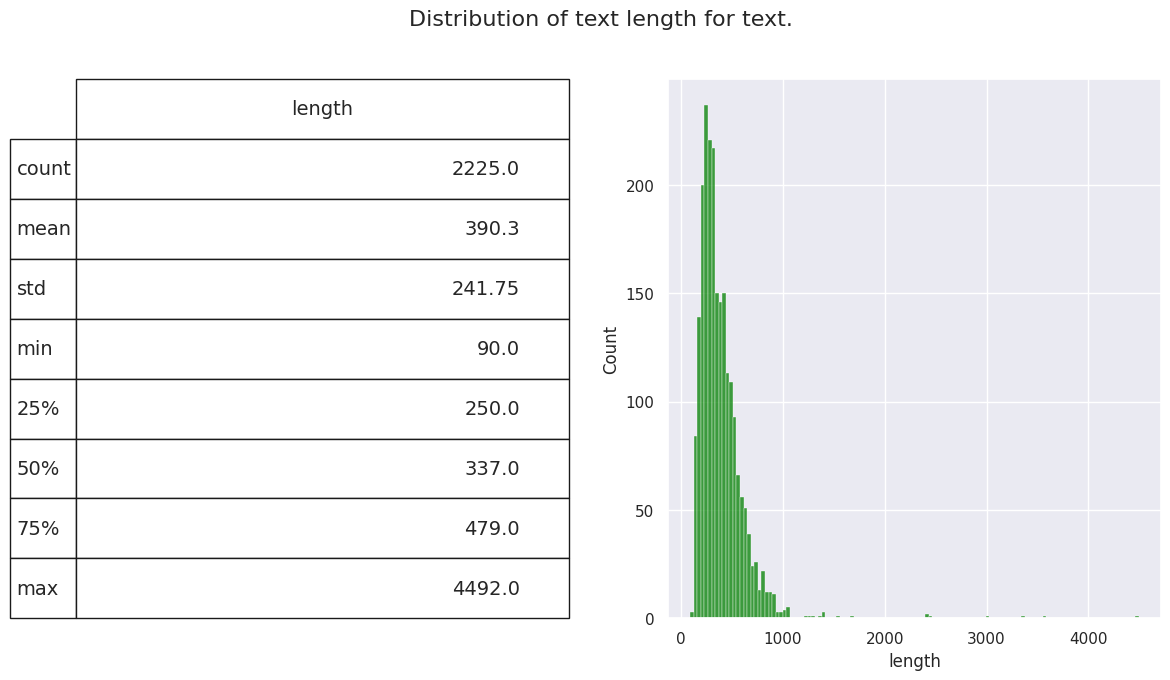

In [ ]:
fig = plt.figure(figsize=(14,7))
df['length'] = df.text.str.split().apply(len)
ax1 = fig.add_subplot(122)
sns.histplot(df['length'], ax=ax1,color='green')
describe = df.length.describe().to_frame().round(2)

ax2 = fig.add_subplot(121)
ax2.axis('off')
font_size = 14
bbox = [0, 0, 1, 1]
table = ax2.table(cellText = describe.values, rowLabels = describe.index, bbox=bbox, colLabels=describe.columns)
table.set_fontsize(font_size)
fig.suptitle('Distribution of text length for text.', fontsize=16)

plt.show()

<Axes: xlabel='category', ylabel='count'>

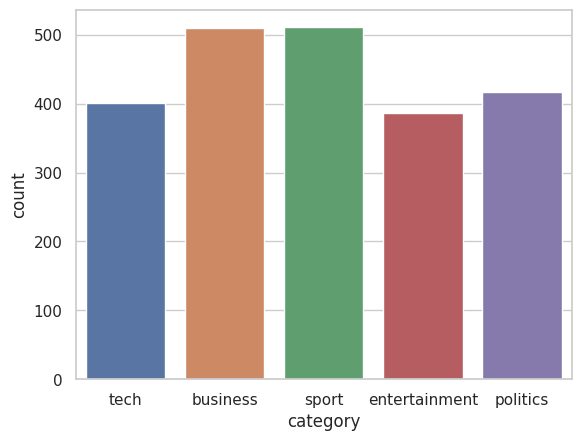

In [ ]:
sns.set_theme(style="whitegrid")
sns.countplot(x=df["category"])

In [ ]:
top = Counter([item for sublist in df['short_word'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Common_words','count']
fig = px.bar(temp, x="count", y="Common_words", title='Commmon Words in Selected Text', orientation='h', 
             width=700, height=700,color='Common_words')
fig.show()

In [ ]:
sport_text = df[df['category']=='sport']
business_text = df[df['category']=='business'] 
politics_text = df[df['category']=='politics']
tech_text = df[df['category']=='tech'] 
entertainment_text = df[df['category']=='entertainment'] 

In [ ]:
top = Counter([item for sublist in sport_text['short_word'] for item in sublist])
temp_positive = pd.DataFrame(top.most_common(20))
temp_positive.columns = ['Common_words','count']
fig = px.bar(temp_positive, x="count", y="Common_words", title='Most Commmon Words in sport_text', orientation='h', 
             width=700, height=700,color='Common_words')
fig.show()

In [ ]:
top = Counter([item for sublist in business_text['short_word'] for item in sublist])
temp_positive = pd.DataFrame(top.most_common(20))
temp_positive.columns = ['Common_words','count']
fig = px.bar(temp_positive, x="count", y="Common_words", title='Most Commmon Words in business_text', orientation='h', 
             width=700, height=700,color='Common_words')
fig.show()

In [ ]:
top = Counter([item for sublist in politics_text['short_word'] for item in sublist])
temp_positive = pd.DataFrame(top.most_common(20))
temp_positive.columns = ['Common_words','count']
fig = px.bar(temp_positive, x="count", y="Common_words", title='Most Commmon Words in politics_text', orientation='h', 
             width=700, height=700,color='Common_words')
fig.show()

In [ ]:
top = Counter([item for sublist in tech_text['short_word'] for item in sublist])
temp_positive = pd.DataFrame(top.most_common(20))
temp_positive.columns = ['Common_words','count']
fig = px.bar(temp_positive, x="count", y="Common_words", title='Most Commmon Words in tech_text', orientation='h', 
             width=700, height=700,color='Common_words')
fig.show()

In [ ]:
top = Counter([item for sublist in entertainment_text['short_word'] for item in sublist])
temp_positive = pd.DataFrame(top.most_common(20))
temp_positive.columns = ['Common_words','count']
fig = px.bar(temp_positive, x="count", y="Common_words", title='Most Commmon Words in entertainment_text', orientation='h', 
             width=700, height=700,color='Common_words')
fig.show()

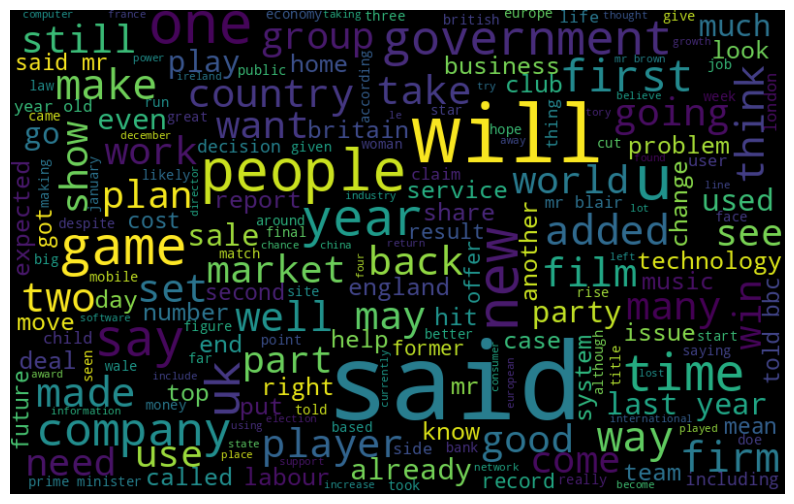

In [ ]:
normal_words =' '.join([text for text in df['Text']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

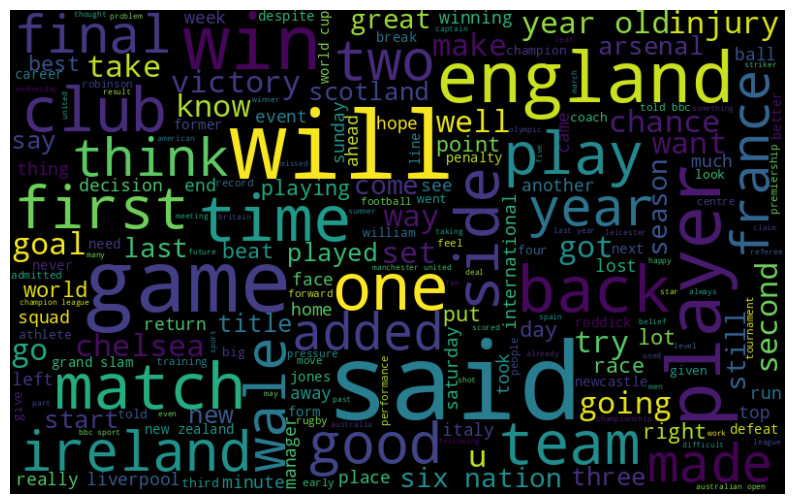

In [ ]:
normal_words =' '.join([text for text in df['Text'][df['category'] == 'sport']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

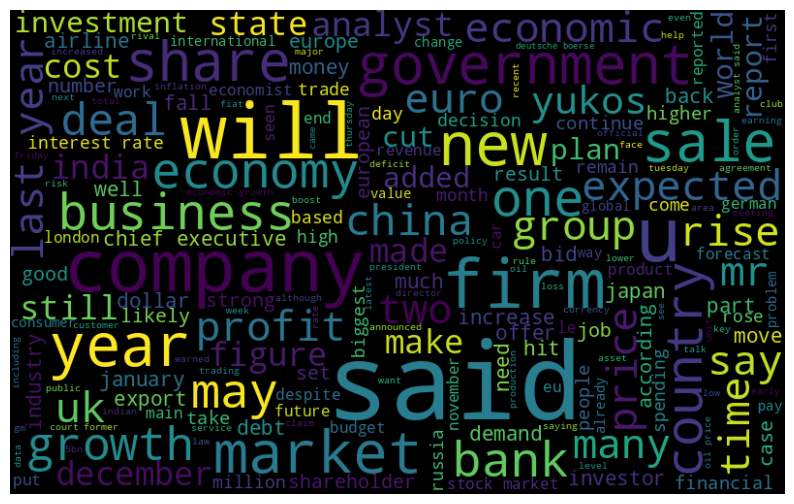

In [ ]:
normal_words =' '.join([text for text in df['Text'][df['category'] == 'business']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

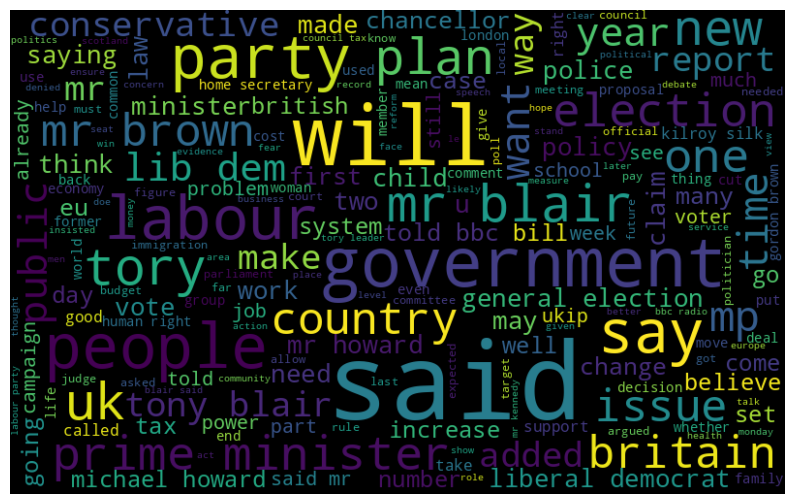

In [ ]:
normal_words =' '.join([text for text in df['Text'][df['category'] == 'politics']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

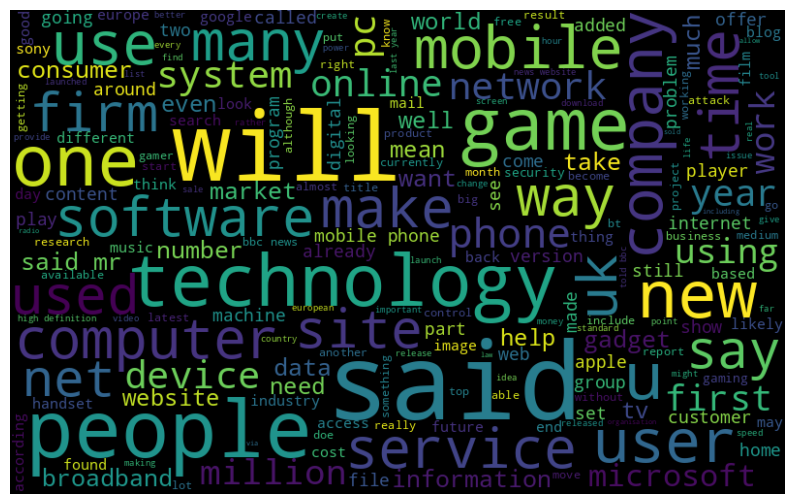

In [ ]:
normal_words =' '.join([text for text in df['Text'][df['category'] == 'tech']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

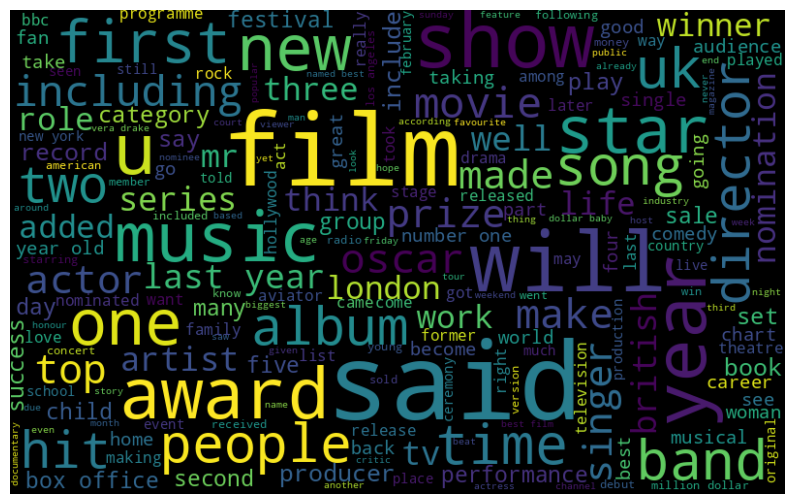

In [ ]:
normal_words =' '.join([text for text in df['Text'][df['category'] == 'entertainment']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

## **Applying N-gram**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df["Text"],df["category"], test_size = 0.25, random_state = 42)    
count_vect = CountVectorizer(ngram_range=(1, 2))        
transformer = TfidfTransformer(norm='l2',sublinear_tf=True)
x_train_counts = count_vect.fit_transform(x_train)
x_train_tfidf = transformer.fit_transform(x_train_counts)

x_test_counts = count_vect.transform(x_test)
x_test_tfidf = transformer.transform(x_test_counts)

print (x_train_tfidf.shape,x_test_tfidf.shape, y_train.shape, y_test.shape)

(1668, 284054) (557, 284054) (1668,) (557,)


In [ ]:
joblib.dump(count_vect, 'count_vect.pkl')
#model = joblib.load('count_vect.pkl')

['count_vect.pkl']

# **Machine Learning Models**

# **Logistic Regression**

In [ ]:
lr = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
lr.fit(x_train_tfidf, y_train)
y_pred1 = lr.predict(x_test_tfidf)
print("Accuracy: "+str(accuracy_score(y_test,y_pred1)))
print(classification_report(y_test, y_pred1))

Accuracy: 0.9658886894075404
               precision    recall  f1-score   support

     Business       0.94      0.96      0.95       136
Entertainment       1.00      0.94      0.97        96
     Politics       0.94      0.98      0.96        98
        Sport       0.98      0.99      0.98       124
         Tech       0.98      0.95      0.97       103

     accuracy                           0.97       557
    macro avg       0.97      0.96      0.97       557
 weighted avg       0.97      0.97      0.97       557



In [ ]:
mc = count_vect.transform(["howard hits back at mongrel jibe michael howard has said a claim by peter hain that the tory leader is acting like an attack mongrel shows labour is rattled by the opposition. in an upbeat speech to his party s spring conference in brighton he said labour s campaigning tactics proved the tories were hitting home. mr hain made the claim about tory tactics in the anti-terror bill debate. something tells me that someone somewhere out there is just a little bit rattled mr howard said. mr hain leader of the commons told bbc radio four s today programme that mr howard s stance on the government s anti-terrorism legislation was putting the country at risk. he then accused the tory leader of behaving like an attack mongrel and playing opposition for opposition sake . mr howard told his party that labour would do anything say anything claim anything to cling on to office at all costs . so far this year they have compared me to fagin to shylock and to a flying pig. this morning peter hain even called me a mongrel. i don t know about you but something tells me that someone somewhere out there is just a little bit rattled. environment secretary margaret beckett rejected mr howard s comment telling radio 4 s pm programme that labour was not rattled . we have a very real duty to try to get people to focus on michael howard s record what the proposals are that he is trying to put forward to the country and also the many examples we are seeing now of what we believe is really poor judgement on his behalf. mr howard said tory policies on schools taxes immigration and crime were striking a chord with voters. since the beginning of this year - election year - we ve been making the political weather he told the party conference. mr howard denied he had been playing politics by raising the case of margaret dixon whose operation had been cancelled seven times which grabbed headlines for the party two weeks ago. and he hit back at labour claims he had used mrs dixon as a human shield . she s not a human shield mr blair she s a human being. mr howard said his party plans for immigration quotas which have also been the focus of much media coverage were not racist - just common sense . he pledged cleaner hospitals and better school discipline with a promise to get rid of political correctness in the national curriculum and give everyone to the same chance of a decent state education as he had. i come from an ordinary family. if the teenage michael howard were applying to cambridge today gordon brown would love me. and he stressed his party s commitment to cut taxes and red tape and increase the basic state pension in line with earnings. he finished with a personal appeal to party activists to go out and win the next election. one day you will be able to tell your children and grandchildren as i will tell mine i was there. i did my bit. i played my part. i helped to win that famous election - the election that transformed our country for the better . labour election co-ordinator alan milburn said: michael howard s speech today confirms what we have always said - that his only strategy is opportunism but he has no forward vision for the country. in reference to the appearance of mr howard s family on the conference stage with him mr milburn said: michael howard is perfectly entitled to pose with his family today. but it is the hard working families across britain that will be damaged by his plan to cut £35bn from public spending."])
m = transformer.transform(mc)
y_pred = lr.predict(m)
print(y_pred)

['Politics']


In [ ]:
scores = cross_val_score(lr, x_train_tfidf,y_train, cv=10)  
print(accuracy_score(y_test,y_pred1))
print ("Cross-validated scores:", scores)

0.9658886894075404
Cross-validated scores: [0.98203593 0.96407186 0.98203593 0.98802395 0.95209581 0.98203593
 0.9760479  0.96407186 0.96987952 0.97590361]


In [ ]:
joblib.dump(lr, 'Text_LR.pkl')
#model = joblib.load('Text_LR.pkl')

['Text_LR.pkl']

# **Support Vector Machine**

In [ ]:
svc = LinearSVC()
svc.fit(x_train_tfidf, y_train)
y_pred2 = svc.predict(x_test_tfidf)
print("Accuracy: "+str(accuracy_score(y_test,y_pred2)))
print(classification_report(y_test, y_pred2))

Accuracy: 0.9694793536804309
               precision    recall  f1-score   support

     business       0.97      0.94      0.96       136
entertainment       1.00      0.95      0.97        96
     politics       0.93      0.99      0.96        98
        sport       0.98      0.99      0.98       124
         tech       0.97      0.98      0.98       103

     accuracy                           0.97       557
    macro avg       0.97      0.97      0.97       557
 weighted avg       0.97      0.97      0.97       557



In [ ]:
mc = count_vect.transform(["To combat this trend, we need politicians who are willing to stand up for the interests of the working class. We need leaders who are committed to creating a more just and equitable society, where everyone has a chance to succeed regardless of their background."])
m = transformer.transform(mc)
y_pred = svc.predict(m)
print(y_pred)

['politics']


In [ ]:
scores = cross_val_score(svc, x_train_tfidf,y_train, cv=10)   
print(accuracy_score(y_test,y_pred2))
print ("Cross-validated scores:", scores)

0.9694793536804309
Cross-validated scores: [0.98203593 0.96407186 0.98802395 0.99401198 0.97005988 0.99401198
 0.98203593 0.97005988 0.98795181 0.98795181]


In [ ]:
joblib.dump(svc, 'Text_SVM.pkl')
#model = joblib.load('Text_SVM.pkl')

['Text_SVM.pkl']



## **Naive Bayes(Multinomial)**

In [ ]:
mnb = MultinomialNB()
mnb.fit(x_train_tfidf, y_train)
y_pred3 = mnb.predict(x_test_tfidf)
print("Accuracy: "+str(accuracy_score(y_test,y_pred3)))
print(classification_report(y_test, y_pred3))

Accuracy: 0.9497307001795332
               precision    recall  f1-score   support

     business       0.92      0.96      0.94       136
entertainment       1.00      0.84      0.92        96
     politics       0.91      0.99      0.95        98
        sport       0.96      1.00      0.98       124
         tech       0.98      0.94      0.96       103

     accuracy                           0.95       557
    macro avg       0.95      0.95      0.95       557
 weighted avg       0.95      0.95      0.95       557



In [ ]:
mc = count_vect.transform(["One of the biggest challenges facing politicians today is the growing divide between the rich and poor. The concentration of wealth in the hands of a few individuals is a major threat to our democracy, as it allows a small group of people to exert an outsized influence on our political system."])
m = transformer.transform(mc)
y_pred = mnb.predict(m)
print(y_pred)

['politics']


In [ ]:
scores = cross_val_score(mnb, x_train_tfidf,y_train, cv=10)   
print(accuracy_score(y_test,y_pred3))
print ("Cross-validated scores:", scores)

0.9497307001795332
Cross-validated scores: [0.96407186 0.95209581 0.97005988 0.94610778 0.91017964 0.94610778
 0.94610778 0.94011976 0.94578313 0.96385542]


## **Randomforest**


In [ ]:
rfc = RandomForestClassifier(n_estimators=300, max_depth=15, random_state=42, class_weight='balanced')
rfc.fit(x_train_tfidf,y_train)
y_pred4 = rfc.predict(x_test_tfidf)
print("Accuracy: "+str(accuracy_score(y_test,y_pred4)))
print(classification_report(y_test, y_pred4))

Accuracy: 0.9515260323159784
               precision    recall  f1-score   support

     business       0.90      0.96      0.93       136
entertainment       1.00      0.92      0.96        96
     politics       0.95      0.94      0.94        98
        sport       0.95      0.99      0.97       124
         tech       1.00      0.94      0.97       103

     accuracy                           0.95       557
    macro avg       0.96      0.95      0.95       557
 weighted avg       0.95      0.95      0.95       557



In [ ]:
mc = count_vect.transform(["But what really set this movie apart for me was the way it integrated Chinese culture and mythology into the story. As a Chinese-American myself, it was incredibly meaningful to see my culture and heritage represented on the big screen in such a beautiful and authentic way. From the stunning visuals to the traditional music and dance, everything felt like it was done with care and respect."])
m = transformer.transform(mc)
y_pred = rfc.predict(m)
print(y_pred)

['entertainment']


In [ ]:
scores = cross_val_score(rfc, x_train_tfidf,y_train, cv=10)   
print(accuracy_score(y_test,y_pred4))
print ("Cross-validated scores:", scores)

0.9515260323159784
Cross-validated scores: [0.98203593 0.96407186 0.9760479  0.98802395 0.95209581 0.98203593
 0.94610778 0.96407186 0.98795181 0.98192771]


# **GradientBoostingClassifier**

In [ ]:
gbc = GradientBoostingClassifier(n_estimators=100, max_features='auto', max_depth=4, random_state=1, verbose=1)
gbc.fit(x_train_tfidf, y_train)
y_pred5 = gbc.predict(x_test_tfidf)
print(accuracy_score(y_test, y_pred5))
print(classification_report(y_test, y_pred5))

      Iter       Train Loss   Remaining Time 
         1           1.3220            8.12m
         2           1.1316            7.99m
         3           0.9848            6.69m
         4           0.8673            6.41m
         5           0.7704            5.88m
         6           0.6888            5.50m
         7           0.6199            5.21m
         8           0.5603            5.02m
         9           0.5102            5.00m
        10           0.4643            4.83m
        20           0.2079            4.14m
        30           0.1177            3.47m
        40           0.0760            2.88m
        50           0.0522            2.35m
        60           0.0373            1.85m
        70           0.0268            1.38m
        80           0.0201           54.62s
        90           0.0150           27.17s
       100           0.0112            0.00s
0.9425493716337523
               precision    recall  f1-score   support

     business       0.88

In [ ]:
scores = cross_val_score(gbc, x_train_tfidf,y_train, cv=5)   
print(accuracy_score(y_test,y_pred5))
print ("Cross-validated scores:", scores)

      Iter       Train Loss   Remaining Time 
         1           1.3157            9.90m
         2           1.1217           10.98m
         3           0.9711           10.55m
         4           0.8531           10.81m
         5           0.7553           10.52m
         6           0.6748           10.62m
         7           0.6082           10.39m
         8           0.5477           10.39m
         9           0.4941           10.22m
        10           0.4475           10.15m
        20           0.1962            9.15m
        30           0.1100            7.99m
        40           0.0685            6.83m
        50           0.0451            5.69m
        60           0.0310            4.55m
        70           0.0218            3.39m
        80           0.0155            2.26m
        90           0.0110            1.12m
       100           0.0080            0.00s
      Iter       Train Loss   Remaining Time 
         1           1.3200           11.70m
        

## **Ensemble Classifier**

In [ ]:
mnb = MultinomialNB()
rfc= RandomForestClassifier(n_estimators=1000, max_depth=12, random_state=42)
lr = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
svc = SVC(probability=True)
ec=VotingClassifier(estimators=[('Multinominal NB', mnb), ('Random Forest', rfc),('Logistic Regression',lr),('Support Vector Machine',svc)], voting='soft', weights=[1,2,3,4]) 
ec.fit(x_train_tfidf,y_train)                                                 
y_pred6 = ec.predict(x_test_tfidf)
print(accuracy_score(y_test, y_pred6))
print(classification_report(y_test, y_pred6))

0.9712746858168761
               precision    recall  f1-score   support

     business       0.98      0.95      0.96       136
entertainment       0.99      0.95      0.97        96
     politics       0.93      0.99      0.96        98
        sport       0.99      0.99      0.99       124
         tech       0.96      0.98      0.97       103

     accuracy                           0.97       557
    macro avg       0.97      0.97      0.97       557
 weighted avg       0.97      0.97      0.97       557



In [ ]:
mc = count_vect.transform(["But what really set this movie apart for me was the way it integrated Chinese culture and mythology into the story. As a Chinese-American myself, it was incredibly meaningful to see my culture and heritage represented on the big screen in such a beautiful and authentic way. From the stunning visuals to the traditional music and dance, everything felt like it was done with care and respect."])
m = transformer.transform(mc)
y_pred = ec.predict(m)
print(y_pred)

['entertainment']


In [ ]:
scores = cross_val_score(ec, x_train_tfidf,y_train, cv=10)  
print(accuracy_score(y_test,y_pred6))
print ("Cross-validated scores:", scores)

0.9712746858168761
Cross-validated scores: [0.98203593 0.97005988 0.98802395 0.98802395 0.95209581 0.98802395
 0.9760479  0.97005988 0.9939759  0.98192771]


In [ ]:
joblib.dump(ec, 'Text_Ensemble.pkl')
#model = joblib.load('Text_Ensemble.pkl')

['Text_Ensemble.pkl']

## **AdaBoost with Random Forest Classifier**

In [ ]:
rfc = RandomForestClassifier(n_estimators=100, max_depth=9, random_state=0)
abc= AdaBoostClassifier(base_estimator=rfc, learning_rate=0.2, n_estimators=100)
abc.fit(x_train_tfidf, y_train)                                                   
y_pred7= abc.predict(x_test_tfidf)
print("Accuracy: "+str(accuracy_score(y_test, y_pred7)))
print(classification_report(y_test, y_pred7))

Accuracy: 0.9443447037701975
               precision    recall  f1-score   support

     business       0.87      0.98      0.92       136
entertainment       0.99      0.91      0.95        96
     politics       0.97      0.91      0.94        98
        sport       0.95      0.99      0.97       124
         tech       1.00      0.91      0.95       103

     accuracy                           0.94       557
    macro avg       0.95      0.94      0.95       557
 weighted avg       0.95      0.94      0.94       557



In [ ]:
scores = cross_val_score(abc, x_train_tfidf,y_train, cv=10)   
print(accuracy_score(y_test,y_pred7))
print ("Cross-validated scores:", scores)

0.9443447037701975
Cross-validated scores: [0.9760479  0.95209581 0.9760479  0.98203593 0.91017964 0.9760479
 0.92215569 0.95209581 0.95180723 0.96385542]


# **Comparison Between ML Models**

In [ ]:
Comparison_unibi = pd.DataFrame({'Logistic Regression': [accuracy_score(y_test,y_pred1)*100,f1_score(y_test,y_pred1,average='macro')*100,recall_score(y_test, y_pred1,average='micro')*100,precision_score(y_test, y_pred1,average='micro')*100],
                            'SVM':[accuracy_score(y_test,y_pred2)*100,f1_score(y_test,y_pred2,average='macro')*100,recall_score(y_test, y_pred2,average='micro')*100,precision_score(y_test, y_pred2,average='micro')*100],
                           'Naive Bayes':[accuracy_score(y_test,y_pred3)*100,f1_score(y_test,y_pred3,average='macro')*100,recall_score(y_test, y_pred3,average='micro')*100,precision_score(y_test, y_pred3,average='micro')*100],
                           'Random Forest':[accuracy_score(y_test,y_pred4)*100,f1_score(y_test,y_pred4,average='macro')*100,recall_score(y_test, y_pred4,average='micro')*100,precision_score(y_test, y_pred4,average='micro')*100],
                           'GradientBoosting':[accuracy_score(y_test,y_pred5)*100,f1_score(y_test,y_pred5,average='macro')*100,recall_score(y_test, y_pred5,average='micro')*100,precision_score(y_test, y_pred5,average='micro')*100],
                           'Ensembled':[accuracy_score(y_test,y_pred6)*100,f1_score(y_test,y_pred6,average='macro')*100,recall_score(y_test, y_pred6,average='micro')*100,precision_score(y_test, y_pred6,average='micro')*100],
                           'Adaboost':[accuracy_score(y_test,y_pred7)*100,f1_score(y_test,y_pred7,average='macro')*100,recall_score(y_test, y_pred7,average='micro')*100,precision_score(y_test, y_pred7,average='micro')*100],

})

In [ ]:
print ('Comparison using uni-bi-gram(1,2)') 
Comparison_unibi.rename(index={0:'Accuracy',1:'F1_score', 2: 'Recall',3:'Precision'}, inplace=True)
Comparison_unibi.head()

Comparison using uni-bi-gram(1,2)


,Logistic Regression,SVM,Naive Bayes,Random Forest,GradientBoosting,Ensembled,Adaboost
Accuracy,96.588869,96.947935,94.973070,95.152603,94.254937,97.127469,94.434470
F1_score,96.599729,96.974547,94.817141,95.277646,94.297451,97.085141,94.514563
Recall,96.588869,96.947935,94.973070,95.152603,94.254937,97.127469,94.434470
Precision,96.588869,96.947935,94.973070,95.152603,94.254937,97.127469,94.434470


# **Deep Learning Models**

In [ ]:
vocabulary_size = 15000
max_text_len = 768
stemmer = SnowballStemmer('english')
stop_words = [word for word in stopwords.words('english') if word not in ["my","haven't","aren't","can","no", "why", "through", "herself", "she", "he", "himself", "you", "you're", "myself", "not", "here", "some", "do", "does", "did", "will", "don't", "doesn't", "didn't", "won't", "should", "should've", "couldn't", "mightn't", "mustn't", "shouldn't", "hadn't", "wasn't", "wouldn't"]]

In [ ]:
def preprocess_text(text):
  
    text = re.sub('[^a-zA-Z]', ' ', text)

    words = text.lower().split()
 
    words = [stemmer.stem(word) for word in words if not word in stop_words]
   
    cleaned_text = ' '.join(words)
    return cleaned_text

df['cleaned_text'] = df['text'].apply(preprocess_text)

In [ ]:
tokenizer = Tokenizer(num_words=vocabulary_size)
tokenizer.fit_on_texts(df['cleaned_text'].values)
le = len(tokenizer.word_index) + 1
print(le)
sequences = tokenizer.texts_to_sequences(df['cleaned_text'].values)
X_DeepLearning = pad_sequences(sequences, maxlen=max_text_len)

18884


In [ ]:
df.loc[df['category'] == 'Sport' , 'LABEL'] = 0     
df.loc[df['category'] == 'Business', 'LABEL'] = 1
df.loc[df['category'] == 'Politics' , 'LABEL'] = 2    
df.loc[df['category'] == 'Tech', 'LABEL'] = 3              
df.loc[df['category'] == 'Entertainment', 'LABEL'] = 4             

labels = to_categorical(df['LABEL'], num_classes=5)
XX_train, XX_test, y_train, y_test = train_test_split(X_DeepLearning , labels, test_size=0.25, random_state=42)
print((XX_train.shape, y_train.shape, XX_test.shape, y_test.shape))

((1668, 768), (1668, 5), (557, 768), (557, 5))


# **LSTM 1-Layer**

In [ ]:
epochs = 25
emb_dim = 256
batch_size = 50       
model_lstm1 = Sequential()
model_lstm1.add(Embedding(vocabulary_size,emb_dim, input_length=X_DeepLearning.shape[1]))
model_lstm1.add(SpatialDropout1D(0.8))                                             
model_lstm1.add(Bidirectional(LSTM(300, dropout=0.5, recurrent_dropout=0.5)))                 
model_lstm1.add(Dropout(0.5))
model_lstm1.add(Flatten())
model_lstm1.add(Dense(64, activation='relu'))
model_lstm1.add(Dropout(0.5))
model_lstm1.add(Dense(5, activation='softmax'))
model_lstm1.compile(optimizer=tf.optimizers.Adam(),loss='categorical_crossentropy', metrics=['acc']) 
print(model_lstm1.summary())                                                                        

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 768, 256)          3840000   
                                                                 
 spatial_dropout1d (SpatialD  (None, 768, 256)         0         
 ropout1D)                                                       
                                                                 
 bidirectional (Bidirectiona  (None, 600)              1336800   
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 600)               0         
                                                                 
 flatten (Flatten)           (None, 600)               0         
                                                                 
 dense (Dense)               (None, 64)                3

In [ ]:
checkpoint_callback = ModelCheckpoint(filepath="lastm-1-layer-best_model.h5", save_best_only=True, monitor="val_acc", mode="max", verbose=1)

early_stopping_callback = EarlyStopping(monitor="val_acc", mode="max", patience=10, verbose=1, restore_best_weights=True)

reduce_lr_callback = ReduceLROnPlateau(monitor="val_loss", factor=0.1, patience=5, verbose=1, mode="min", min_delta=0.0001, cooldown=0, min_lr=0)

callbacks=[checkpoint_callback, early_stopping_callback, reduce_lr_callback]

In [ ]:
history_lstm1 = model_lstm1.fit(XX_train, y_train, epochs = epochs, batch_size = batch_size, validation_data=(XX_test,y_test), callbacks=callbacks)

Epoch 1/25
34/34 [==============================] - ETA: 0s - loss: 1.6074 - acc: 0.2194
Epoch 1: val_acc improved from -inf to 0.29084, saving model to lastm-1-layer-best_model.h5
34/34 [==============================] - 261s 7s/step - loss: 1.6074 - acc: 0.2194 - val_loss: 1.5983 - val_acc: 0.2908 - lr: 0.0010
Epoch 2/25
34/34 [==============================] - ETA: 0s - loss: 1.5809 - acc: 0.2752
Epoch 2: val_acc improved from 0.29084 to 0.42908, saving model to lastm-1-layer-best_model.h5
34/34 [==============================] - 246s 7s/step - loss: 1.5809 - acc: 0.2752 - val_loss: 1.5335 - val_acc: 0.4291 - lr: 0.0010
Epoch 3/25
34/34 [==============================] - ETA: 0s - loss: 1.3708 - acc: 0.4269
Epoch 3: val_acc did not improve from 0.42908
34/34 [==============================] - 248s 7s/step - loss: 1.3708 - acc: 0.4269 - val_loss: 1.2807 - val_acc: 0.3752 - lr: 0.0010
Epoch 4/25
34/34 [==============================] - ETA: 0s - loss: 1.0922 - acc: 0.5198
Epoch 4: val

In [ ]:
results_1 = model_lstm1.evaluate(XX_test, y_test, verbose=False)
print(f'Test results - Loss: {results_1[0]} - Accuracy: {100*results_1[1]}%')

Test results - Loss: 0.36485812067985535 - Accuracy: 92.81867146492004%


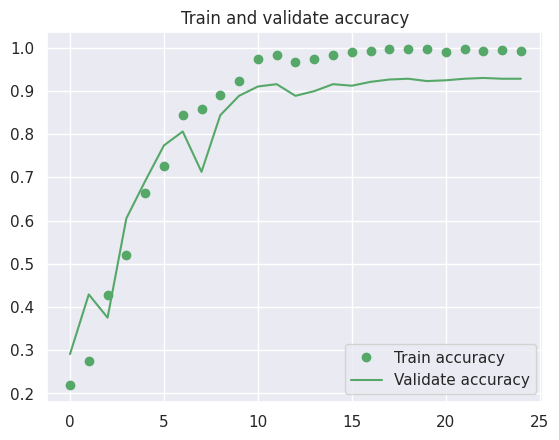

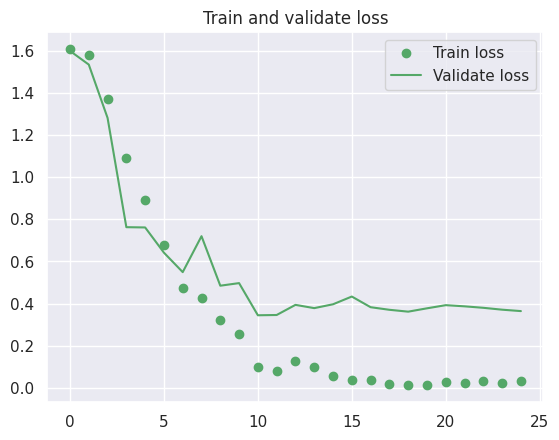

In [ ]:
acc = history_lstm1.history['acc']                        
val_acc = history_lstm1.history['val_acc']
loss = history_lstm1.history['loss']
val_loss = history_lstm1.history['val_loss']
plt.plot( acc, 'go', label='Train accuracy')
plt.plot( val_acc, 'g', label='Validate accuracy')
plt.title('Train and validate accuracy')
plt.legend()                                           

plt.figure()
plt.plot( loss, 'go', label='Train loss')
plt.plot( val_loss, 'g', label='Validate loss')
plt.title('Train and validate loss')
plt.legend()
plt.show()

## **LSTM 2-Layers**

In [ ]:
epochs = 20
emb_dim = 120                     
batch_size = 50                
model_lstm2 = Sequential()            
model_lstm2.add(Embedding(vocabulary_size,emb_dim ,input_length=X_DeepLearning.shape[1]))
model_lstm2.add(SpatialDropout1D(0.8))
model_lstm2.add(Bidirectional(LSTM(200, dropout=0.5, recurrent_dropout=0.5, return_sequences= True)))
model_lstm2.add(Dropout(0.5))
model_lstm2.add(Bidirectional(LSTM(300, dropout=0.5, recurrent_dropout =0.5)))
model_lstm2.add(Dropout(0.5))
model_lstm2.add(Flatten())
model_lstm2.add(Dense(64, activation='relu'))
model_lstm2.add(Dropout(0.5))
model_lstm2.add(Dense(5, activation='softmax'))
model_lstm2.compile(optimizer=tf.optimizers.Adam(),loss='categorical_crossentropy', metrics=['acc']) 
print(model_lstm2.summary())                                                                           

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 768, 120)          1800000   
                                                                 
 spatial_dropout1d (SpatialD  (None, 768, 120)         0         
 ropout1D)                                                       
                                                                 
 bidirectional (Bidirectiona  (None, 768, 400)         513600    
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 768, 400)          0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 600)              1682400   
 nal)                                                            
                                                        

In [ ]:
checkpoint_callback = ModelCheckpoint(filepath="lastm-2-layer-best_model.h5", save_best_only=True, monitor="val_acc", mode="max", verbose=1)

early_stopping_callback = EarlyStopping(monitor="val_acc", mode="max", patience=10, verbose=1, restore_best_weights=True)

reduce_lr_callback = ReduceLROnPlateau(monitor="val_loss", factor=0.1, patience=5, verbose=1, mode="min", min_delta=0.0001, cooldown=0, min_lr=0)

callbacks2=[checkpoint_callback, early_stopping_callback, reduce_lr_callback]

In [ ]:
history_lstm2 = model_lstm2.fit(XX_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(XX_test,y_test), callbacks=callbacks2)

Epoch 1/20
34/34 [==============================] - ETA: 0s - loss: 1.6115 - acc: 0.2080 
Epoch 1: val_acc improved from -inf to 0.22262, saving model to lastm-2-layer-best_model.h5
34/34 [==============================] - 476s 14s/step - loss: 1.6115 - acc: 0.2080 - val_loss: 1.6013 - val_acc: 0.2226 - lr: 0.0010
Epoch 2/20
34/34 [==============================] - ETA: 0s - loss: 1.6058 - acc: 0.2272 
Epoch 2: val_acc improved from 0.22262 to 0.45242, saving model to lastm-2-layer-best_model.h5
34/34 [==============================] - 458s 13s/step - loss: 1.6058 - acc: 0.2272 - val_loss: 1.5408 - val_acc: 0.4524 - lr: 0.0010
Epoch 3/20
34/34 [==============================] - ETA: 0s - loss: 1.3429 - acc: 0.3981 
Epoch 3: val_acc improved from 0.45242 to 0.47397, saving model to lastm-2-layer-best_model.h5
34/34 [==============================] - 477s 14s/step - loss: 1.3429 - acc: 0.3981 - val_loss: 1.1140 - val_acc: 0.4740 - lr: 0.0010
Epoch 4/20
34/34 [============================

In [ ]:
results_2 = model_lstm2.evaluate(XX_test, y_test, verbose=False)
print(f'Test results - Loss: {results_2[0]} - Accuracy: {100*results_2[1]}%')

Test results - Loss: 0.3608902394771576 - Accuracy: 90.84380865097046%


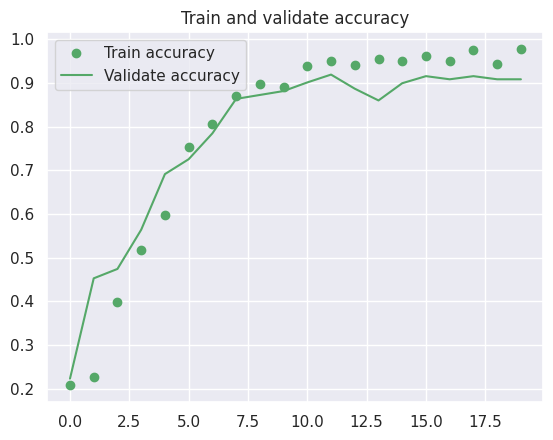

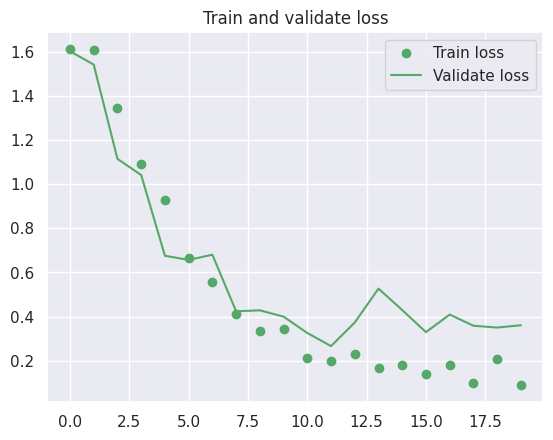

In [ ]:
acc = history_lstm2.history['acc']                          
val_acc = history_lstm2.history['val_acc']
loss = history_lstm2.history['loss']
val_loss = history_lstm2.history['val_loss']

plt.plot( acc, 'go', label='Train accuracy')
plt.plot( val_acc, 'g', label='Validate accuracy')
plt.title('Train and validate accuracy')
plt.legend()                                            

plt.figure()

plt.plot( loss, 'go', label='Train loss')
plt.plot( val_loss, 'g', label='Validate loss')
plt.title('Train and validate loss')
plt.legend()

plt.show() 

## **GRU**

In [ ]:
epochs = 20
emb_dim = 256                     
batch_size = 50                
model_gru = Sequential()            
model_gru.add(Embedding(vocabulary_size,emb_dim ,input_length=X_DeepLearning.shape[1]))
model_gru.add(SpatialDropout1D(0.8))
model_gru.add(GRU(units=64, dropout=0.2, recurrent_dropout=0.2))
model_gru.add(Dropout(0.5))
model_gru.add(Dense(256, activation='relu'))
model_gru.add(Dropout(0.5))
model_gru.add(Dense(5, activation='softmax'))
model_gru.compile(optimizer=tf.optimizers.Adam(),loss='categorical_crossentropy', metrics=['acc']) 
print(model_gru.summary())                                                                           

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 768, 256)          3840000   
                                                                 
 spatial_dropout1d_1 (Spatia  (None, 768, 256)         0         
 lDropout1D)                                                     
                                                                 
 gru (GRU)                   (None, 64)                61824     
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 256)               16640     
                                                                 
 dropout_4 (Dropout)         (None, 256)               0         
                                                      

In [ ]:
checkpoint_callback = ModelCheckpoint(filepath="gru-best_model.h5", save_best_only=True, monitor="val_acc", mode="max", verbose=1)

early_stopping_callback = EarlyStopping(monitor="val_acc", mode="max", patience=10, verbose=1, restore_best_weights=True)

reduce_lr_callback = ReduceLROnPlateau(monitor="val_loss", factor=0.1, patience=5, verbose=1, mode="min", min_delta=0.0001, cooldown=0, min_lr=0)

callbacks3=[checkpoint_callback, early_stopping_callback, reduce_lr_callback]

In [ ]:
history_gru = model_gru.fit(XX_train, y_train, epochs=epochs, batch_size=batch_size,validation_data=(XX_test,y_test), callbacks=callbacks3)

Epoch 1/20
34/34 [==============================] - ETA: 0s - loss: 1.6055 - acc: 0.2158
Epoch 1: val_acc improved from -inf to 0.22621, saving model to gru-best_model.h5
34/34 [==============================] - 110s 3s/step - loss: 1.6055 - acc: 0.2158 - val_loss: 1.6021 - val_acc: 0.2262 - lr: 0.0010
Epoch 2/20
34/34 [==============================] - ETA: 0s - loss: 1.5944 - acc: 0.2536
Epoch 2: val_acc improved from 0.22621 to 0.26750, saving model to gru-best_model.h5
34/34 [==============================] - 110s 3s/step - loss: 1.5944 - acc: 0.2536 - val_loss: 1.5925 - val_acc: 0.2675 - lr: 0.0010
Epoch 3/20
34/34 [==============================] - ETA: 0s - loss: 1.5777 - acc: 0.2740
Epoch 3: val_acc improved from 0.26750 to 0.30700, saving model to gru-best_model.h5
34/34 [==============================] - 108s 3s/step - loss: 1.5777 - acc: 0.2740 - val_loss: 1.5651 - val_acc: 0.3070 - lr: 0.0010
Epoch 4/20
34/34 [==============================] - ETA: 0s - loss: 1.4475 - acc: 

In [ ]:
results_3 = model_gru.evaluate(XX_test, y_test, verbose=False)
print(f'Test results - Loss: {results_3[0]} - Accuracy: {100*results_3[1]}%')

Test results - Loss: 0.4353935718536377 - Accuracy: 91.74147248268127%


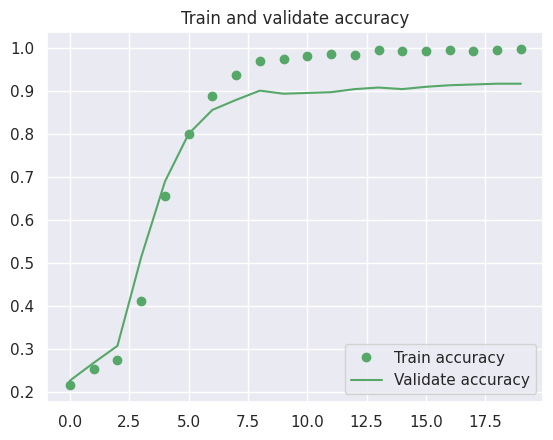

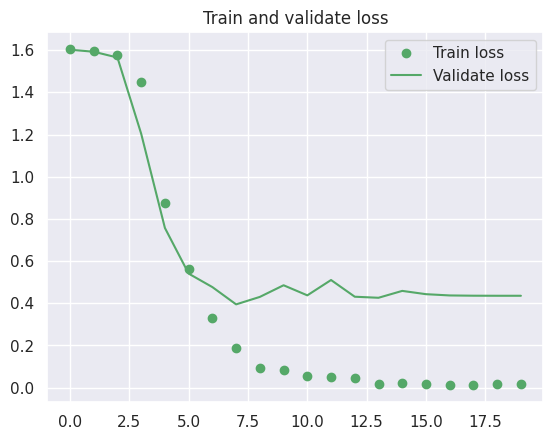

In [ ]:
acc = history_gru.history['acc']                          
val_acc = history_gru.history['val_acc']
loss = history_gru.history['loss']
val_loss = history_gru.history['val_loss']

plt.plot( acc, 'go', label='Train accuracy')
plt.plot( val_acc, 'g', label='Validate accuracy')
plt.title('Train and validate accuracy')
plt.legend()                                            

plt.figure()

plt.plot( loss, 'go', label='Train loss')
plt.plot( val_loss, 'g', label='Validate loss')
plt.title('Train and validate loss')
plt.legend()

plt.show() 

## **CNN+LSTM**

In [ ]:
epochs = 20
emb_dim = 256                                                                
batch_size = 50
model_cl = Sequential()
model_cl.add(Embedding(vocabulary_size,emb_dim, input_length=X_DeepLearning.shape[1]))
model_cl.add(SpatialDropout1D(0.8))
model_cl.add(Conv1D(filters=64, kernel_size=6, padding='same', activation='relu'))
model_cl.add(MaxPooling1D(pool_size=2))
model_cl.add(Conv1D(filters=32, kernel_size=6, activation='relu'))
model_cl.add(MaxPooling1D(pool_size=2))
model_cl.add(Bidirectional(LSTM(100, dropout=0.5, recurrent_dropout=0.5, return_sequences=True)))
model_cl.add(Dropout(0.5))
model_cl.add(Bidirectional(LSTM(400, dropout=0.5, recurrent_dropout=0.5)))
model_cl.add(Dropout(0.5))
model_cl.add(Flatten())
model_cl.add(Dense(64, activation='relu'))
model_cl.add(Dropout(0.5))
model_cl.add(Dense(5, activation='softmax'))
model_cl.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['acc'])
print(model_cl.summary())                                                                           

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 768, 256)          3840000   
                                                                 
 spatial_dropout1d (SpatialD  (None, 768, 256)         0         
 ropout1D)                                                       
                                                                 
 conv1d (Conv1D)             (None, 768, 64)           98368     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 384, 64)          0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 379, 32)           12320     
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 189, 32)          0

In [ ]:
checkpoint_callback = ModelCheckpoint(filepath="cnn+lastm-best_model.h5", save_best_only=True, monitor="val_acc", mode="max", verbose=1)

early_stopping_callback = EarlyStopping(monitor="val_acc", mode="max", patience=10, verbose=1, restore_best_weights=True)

reduce_lr_callback = ReduceLROnPlateau(monitor="val_loss", factor=0.1, patience=5, verbose=1, mode="min", min_delta=0.0001, cooldown=0, min_lr=0)

callbacks=[checkpoint_callback, early_stopping_callback, reduce_lr_callback]

In [ ]:
history_cl = model_cl.fit(XX_train, y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1, callbacks=callbacks)

Epoch 1/20
31/31 [==============================] - ETA: 0s - loss: 1.6092 - acc: 0.2112 
Epoch 1: val_acc improved from -inf to 0.26347, saving model to cnn+lastm-best_model.h5
31/31 [==============================] - 362s 11s/step - loss: 1.6092 - acc: 0.2112 - val_loss: 1.5981 - val_acc: 0.2635 - lr: 0.0010
Epoch 2/20
31/31 [==============================] - ETA: 0s - loss: 1.6089 - acc: 0.2252 
Epoch 2: val_acc did not improve from 0.26347
31/31 [==============================] - 332s 11s/step - loss: 1.6089 - acc: 0.2252 - val_loss: 1.6002 - val_acc: 0.2156 - lr: 0.0010
Epoch 3/20
31/31 [==============================] - ETA: 0s - loss: 1.5853 - acc: 0.2418 
Epoch 3: val_acc improved from 0.26347 to 0.40120, saving model to cnn+lastm-best_model.h5
31/31 [==============================] - 335s 11s/step - loss: 1.5853 - acc: 0.2418 - val_loss: 1.4076 - val_acc: 0.4012 - lr: 0.0010
Epoch 4/20
31/31 [==============================] - ETA: 0s - loss: 1.1443 - acc: 0.4730 
Epoch 4: val_

In [ ]:
results_4 = model_cl.evaluate(XX_test, y_test, verbose=False)
print(f'Test results - Loss: {results_4[0]} - Accuracy: {100*results_4[1]}%')

Test results - Loss: 0.35947689414024353 - Accuracy: 90.30520915985107%


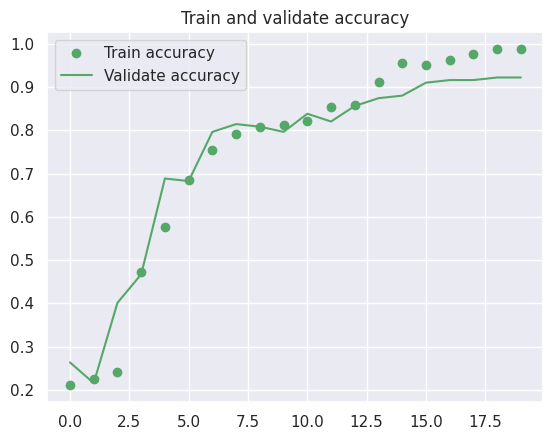

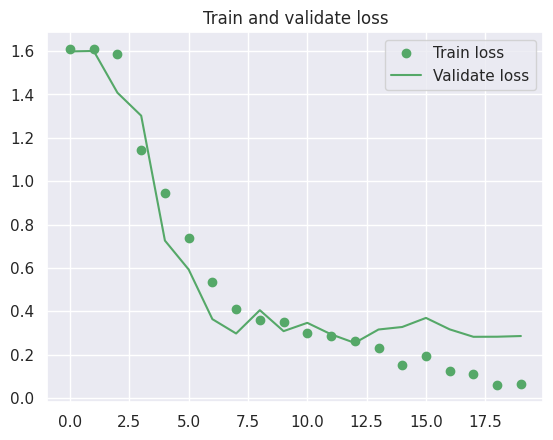

In [ ]:
acc = history_cl.history['acc']                          
val_acc = history_cl.history['val_acc']
loss = history_cl.history['loss']
val_loss = history_cl.history['val_loss']
plt.plot( acc, 'go', label='Train accuracy')
plt.plot( val_acc, 'g', label='Validate accuracy')
plt.title('Train and validate accuracy')
plt.legend()                                           

plt.figure()
plt.plot( loss, 'go', label='Train loss')
plt.plot( val_loss, 'g', label='Validate loss')
plt.title('Train and validate loss')
plt.legend()
plt.show() 

## **Bert Model**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['category'], test_size=0.33, random_state=42)

In [ ]:
X_train = X_train.tolist()
X_test = X_test.tolist()
y_train = y_train.tolist()
y_test = y_test.tolist()

In [ ]:
class_names = ['sport', 'business', 'politics','tech', 'entertainment']

In [ ]:
(x_train,y_train), (x_val,y_val), preproc = text.texts_from_array(x_train=X_train, y_train=y_train,
                                                                       x_test=X_test, y_test=y_test,
                                                                       class_names=class_names,
                                                                       preprocess_mode='bert',
                                                                       maxlen=512, 
                                                                       max_features=20000)

downloading pretrained BERT model (uncased_L-12_H-768_A-12.zip)...
[██████████████████████████████████████████████████]
extracting pretrained BERT model...
done.

cleanup downloaded zip...
done.

preprocessing train...
language: en


Is Multi-Label? False
preprocessing test...
language: en


/usr/local/lib/python3.9/dist-packages/ktrain/utils.py:744: UserWarning: class_names argument was ignored, as they were extracted from string labels in dataset
  warnings.warn(


task: text classification


In [ ]:
model = text.text_classifier('bert', train_data=(x_train,y_train), preproc=preproc)

Is Multi-Label? False
maxlen is 512


/usr/local/lib/python3.9/dist-packages/keras/initializers/initializers.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


done.


In [ ]:
learner = ktrain.get_learner(model, train_data=(x_train,y_train), 
                             val_data=(x_val,y_val),
                             batch_size=6)

In [ ]:
learner.fit_onecycle(2e-5, 3)



begin training using onecycle policy with max lr of 2e-05...
Epoch 1/3
249/249 [==============================] - 276s 993ms/step - loss: 0.7322 - accuracy: 0.7604 - val_loss: 0.1110 - val_accuracy: 0.9782
Epoch 2/3
249/249 [==============================] - 253s 1s/step - loss: 0.0882 - accuracy: 0.9812 - val_loss: 0.0633 - val_accuracy: 0.9810
Epoch 3/3
249/249 [==============================] - 254s 1s/step - loss: 0.0231 - accuracy: 0.9960 - val_loss: 0.0537 - val_accuracy: 0.9878


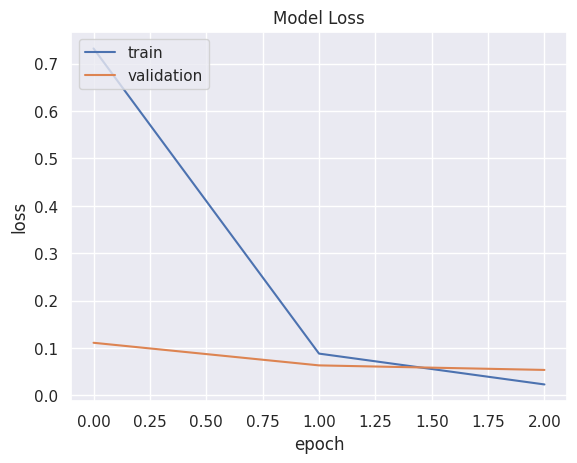

In [ ]:
learner.plot()

In [ ]:
learner.validate(val_data=(x_val,y_val), class_names=class_names)

23/23 [==============================] - 39s 1s/step
               precision    recall  f1-score   support

        sport       0.99      0.96      0.98       181
     business       1.00      0.99      1.00       129
     politics       0.95      1.00      0.98       125
         tech       0.99      1.00      1.00       158
entertainment       0.99      0.99      0.99       142

     accuracy                           0.99       735
    macro avg       0.99      0.99      0.99       735
 weighted avg       0.99      0.99      0.99       735



array([[174,   0,   6,   1,   0],
       [  0, 128,   0,   0,   1],
       [  0,   0, 125,   0,   0],
       [  0,   0,   0, 158,   0],
       [  1,   0,   0,   0, 141]])

In [ ]:
predictor = ktrain.get_predictor(learner.model, preproc)
predictor.get_classes()

['business', 'entertainment', 'politics', 'sport', 'tech']

In [ ]:
message = 'One of the most exciting technological advancements in recent years has been the rise of artificial intelligence (AI) and machine learning (ML) technologies. These technologies have the potential to revolutionize countless industries, from healthcare and finance to manufacturing and transportation.'
prediction = predictor.predict(message)
print('predicted: {}'.format(prediction))

predicted: tech


**Save Bert Model**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
predictor.save("/content/drive/MyDrive/Colab_Notebooks/DL Model/Bert_Model_Text_Classification")

**Load Saved Model and Predict**

In [ ]:
predictor1 = ktrain.load_predictor('/content/drive/MyDrive/Colab_Notebooks/DL Model/Bert_Model_Text_Classification')

/usr/local/lib/python3.9/dist-packages/keras/initializers/initializers.py:120: UserWarning: The initializer TruncatedNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


In [ ]:
data = "One of the biggest challenges facing politicians today is the growing divide between the rich and poor. The concentration of wealth in the hands of a few individuals is a major threat to our democracy, as it allows a small group of people to exert an outsized influence on our political system."
predictor1.predict(data)

'politics'

# **XLNet Model**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['category'], test_size=0.25, random_state=42)

In [ ]:
X_train = X_train.tolist()
X_test = X_test.tolist()
y_train = y_train.tolist()
y_test = y_test.tolist()

In [ ]:
model_name = 'xlnet-base-cased'
trans = text.Transformer(model_name, maxlen = 512, classes = ['sport', 'business', 'politics','tech', 'entertainment'])

/usr/local/lib/python3.9/dist-packages/ktrain/text/preprocessor.py:382: UserWarning: The class_names argument is replacing the classes argument. Please update your code.
  warnings.warn(


/usr/local/lib/python3.9/dist-packages/keras/initializers/initializers.py:120: UserWarning: The initializer TruncatedNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


In [ ]:
train_data = trans.preprocess_train(X_train, y_train)
test_data = trans.preprocess_test(X_test, y_test)

preprocessing train...
language: en
train sequence lengths:
	mean : 388
	95percentile : 733
	99percentile : 938


/usr/local/lib/python3.9/dist-packages/ktrain/utils.py:744: UserWarning: class_names argument was ignored, as they were extracted from string labels in dataset
  warnings.warn(


Is Multi-Label? False
preprocessing test...
language: en
test sequence lengths:
	mean : 396
	95percentile : 772
	99percentile : 1303


In [ ]:
model = trans.get_classifier()

/usr/local/lib/python3.9/dist-packages/keras/initializers/initializers.py:120: UserWarning: The initializer TruncatedNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


In [ ]:
learner = ktrain.get_learner(model, train_data=train_data, val_data=test_data, batch_size=6)

In [ ]:
learner.fit_onecycle(lr=2e-5, epochs=3)



begin training using onecycle policy with max lr of 2e-05...
Epoch 1/3
278/278 [==============================] - 546s 2s/step - loss: 0.6217 - accuracy: 0.8267 - val_loss: 0.1520 - val_accuracy: 0.9533
Epoch 2/3
278/278 [==============================] - 522s 2s/step - loss: 0.1026 - accuracy: 0.9706 - val_loss: 0.1848 - val_accuracy: 0.9533
Epoch 3/3
278/278 [==============================] - 554s 2s/step - loss: 0.0252 - accuracy: 0.9946 - val_loss: 0.0838 - val_accuracy: 0.9785


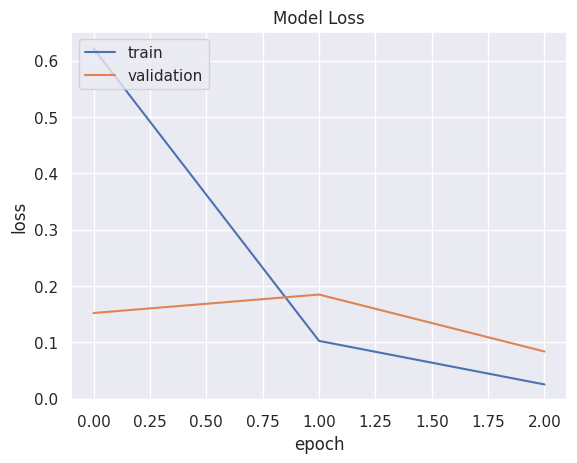

In [ ]:
learner.plot()

In [ ]:
learner.validate(val_data=test_data, class_names=trans.get_classes())#Lol, need more gpu memory

     15/Unknown - 54s 3s/step

ResourceExhaustedError: ignored

In [ ]:
predictor = ktrain.get_predictor(learner.model, preproc= trans)
predictor.get_classes()

['business', 'entertainment', 'politics', 'sport', 'tech']

In [ ]:
predictions = predictor.predict("One of the most exciting technological advancements in recent years has been the rise of artificial intelligence (AI) and machine learning (ML) technologies. These technologies have the potential to revolutionize countless industries, from healthcare and finance to manufacturing and transportation.")
print('predicted: {}'.format(predictions))

predicted: tech


In [ ]:
predictor.save("/content/drive/MyDrive/Colab_Notebooks/DL Model/xlnet_model_Text_Classification")

In [ ]:
predictor1 = ktrain.load_predictor('/content/drive/MyDrive/Colab_Notebooks/DL Model/xlnet_model_Text_Classification')

/usr/local/lib/python3.9/dist-packages/keras/initializers/initializers.py:120: UserWarning: The initializer TruncatedNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


In [ ]:
data = "Politics can be a messy business, but it's essential to the functioning of our society. At its core, politics is about making decisions that affect the lives of millions of people. It's about figuring out how to allocate resources, provide public services, and ensure that everyone has a say in the decisions that affect them."
predictor1.predict(data)

'politics'